Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./catapult_histogram.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

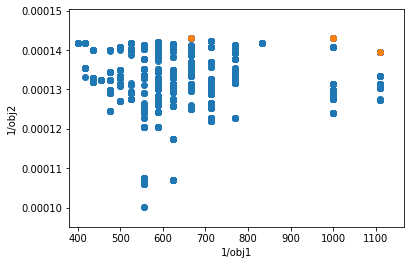

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.010090738251167795


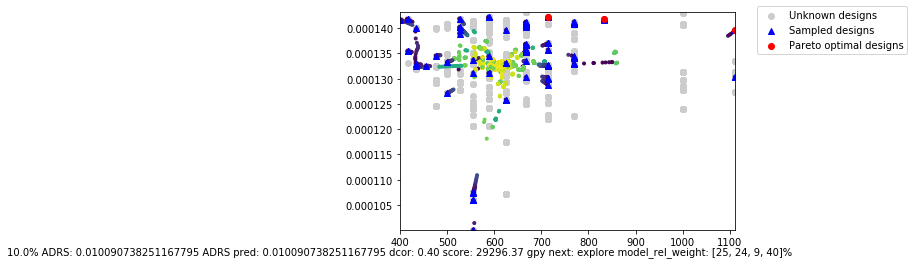

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1769,  803,  805,  801,  791, 1591,   70,  795,   54,   17,  162,
        270,  377,  706,  489,   13,  597,  307,  152,  480,  697, 1438,
        156, 1545,  909,   89,    3, 1335,  572,  711,  683, 1536,  371,
        137,  101,  356,  248,  462, 1195, 1310, 1445, 1220, 1010, 1112,
        412,  524,  635,  842,  943, 1047, 1146,   76,  147, 1580,   91,
       1493, 1588,  844, 1587,   59, 1590,  184,  309,  292,  275, 1262,
        398,  104, 1567,  511,  493,  619, 1566,  729,  827,  931,  742,
       1031, 1883, 1134, 1358, 1245, 1014, 1465, 1449,  413, 1466,   77,
        730, 1589, 1269,  293,  512, 1476,  414, 1376, 1048,  944, 1226,
       1374, 1478,  526, 1135,  932, 1596, 1246,  185,  620,  636, 1840,
       1619, 1756, 1798, 1708,  202, 1359,  828,   15,  399, 1653,   99,
       1550, 1032, 1563, 1147,  420,  857,  741,  198, 1593,  841,   88,
       1577,  428,   98,  854, 1423,  209, 1498, 1311, 1260, 1196, 1524,
       1401, 1535, 1093, 1433,  754,   87,  988,  8